# Regression Challenge
### Completed by Aman Poddar
Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, I have to use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

**Note**: Done as a part of the Microsoft Data Science 30 day challenge

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## REVIEWING DATA

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

My challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) I can achieve (which must be less than **7**) when evaluated against a test subset of data.

## VIEWING LABEL DISTRIBUTION
Label is price_per_unit

<ipython-input-2-eaa8c55a7f96>:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


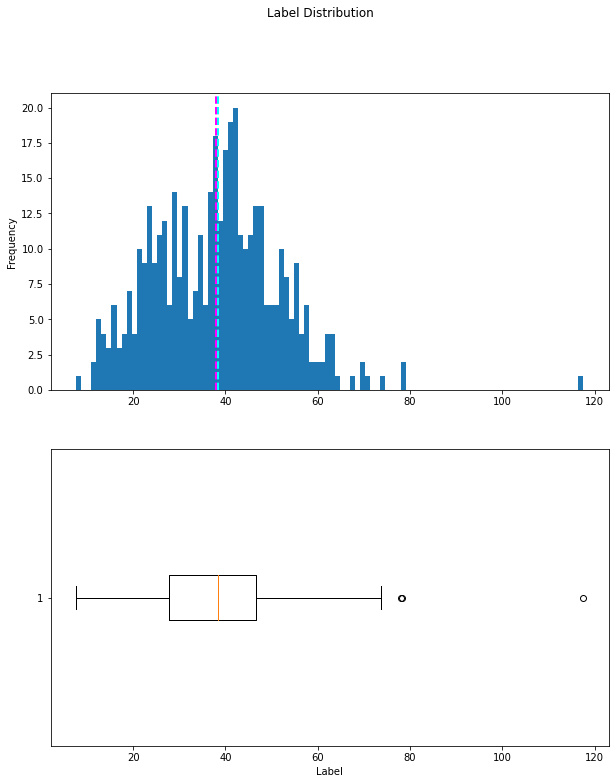

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Getting label column
label = data[data.columns[6]]

# Creating figure for 2 subplots (2 rows and 1 column)
fig, ax = plt.subplots(2,1, figsize=(10,12))

# Plotting histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Adding lines for the mean and median
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plotting boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Title for figure
fig.suptitle('Label Distribution')

#Viewing figure
fig.show()

## CLEARING OUTLINERS
Since outliners exist towards upper end, above 70ish around. Therefore, we will trim data above 70.

<ipython-input-3-821269bb8593>:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


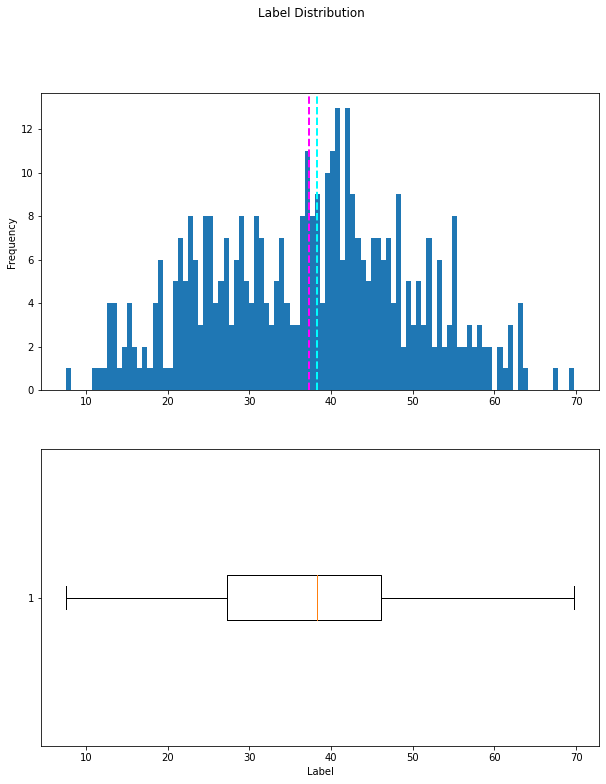

In [3]:
data = data[data['price_per_unit']<70]

# Getting label column
label = data[data.columns[6]]

# Creating figure for 2 subplots (2 rows and 1 column)
fig, ax = plt.subplots(2,1, figsize=(10,12))

# Plotting histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Adding lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plotting boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Title for figure
fig.suptitle('Label Distribution')

#Viewing figure
fig.show()

This looks pretty good.
## NUMERIC CORRELATIONS

Label vs transaction_date is NOT Correlated
Label vs house_age is NOT Correlated
Label vs transit_distance is NOT Correlated
Label vs local_convenience_stores is Correlated
Label vs latitude is Correlated
Label vs longitude is Correlated


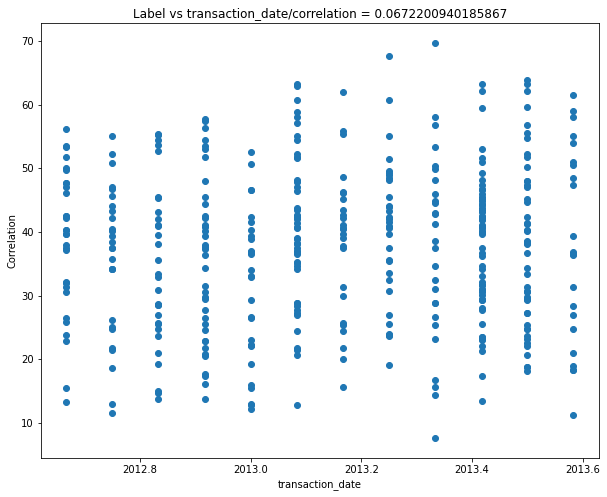

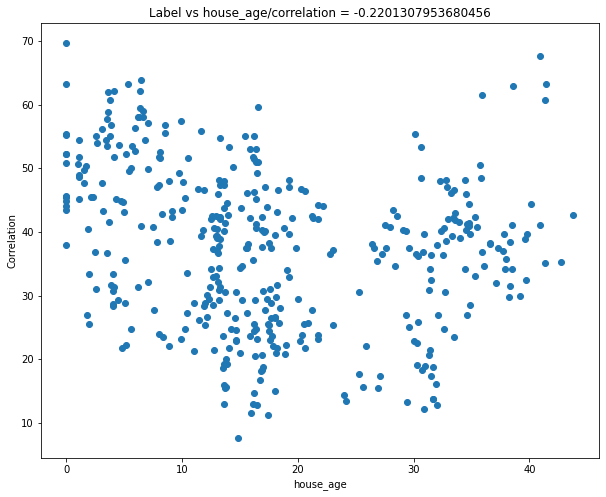

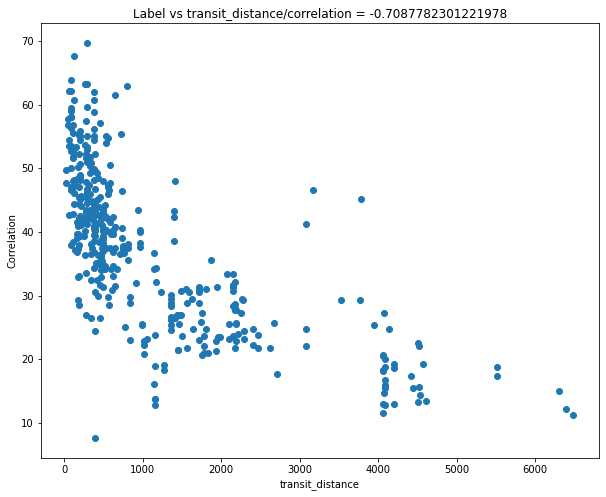

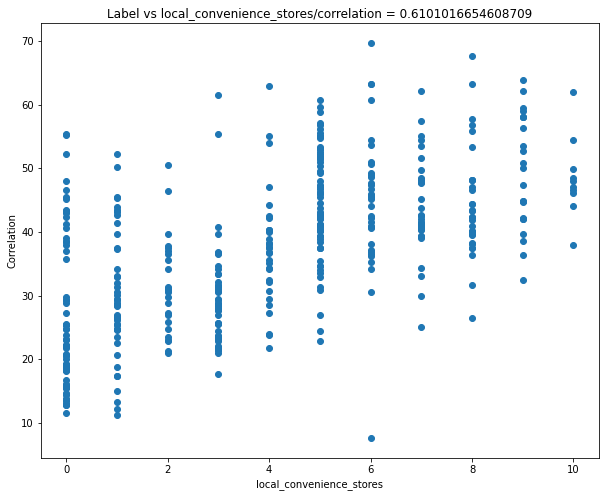

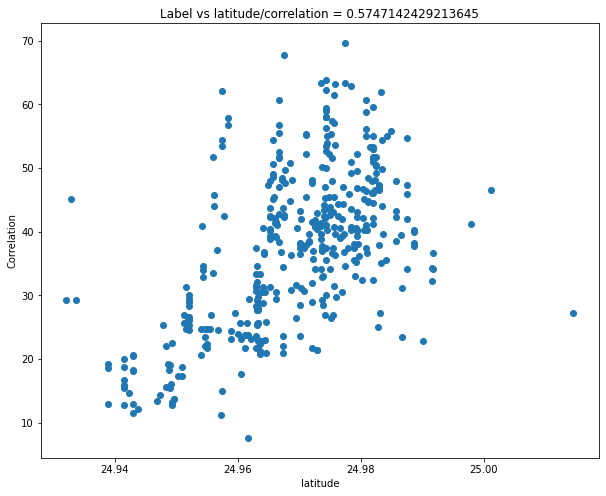

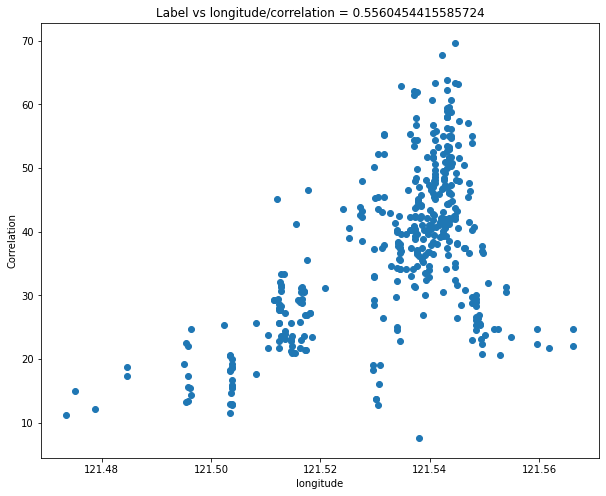

In [4]:
for col in data[data.columns[0:6]]:   # Includes every column in data except the label.
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca() # used to get the current Axes instance on current figure matching the given keyword args.
    feature = data[col]
    correlation = feature.corr(label) # Gets correlation between all the features (other columns) and label.
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlation')
    ax.set_title('Label vs '+ col + '/correlation = '+ str(correlation))
    if(correlation>0.5):
        print('Label vs '+ col + ' is Correlated')
    else:
        print('Label vs '+ col + ' is NOT Correlated')
plt.show()

## CATEGORIAL FEATURES
Since transaction_date and local_convenience_stores seem to be discrete values, so might work better if treated as categorical features.

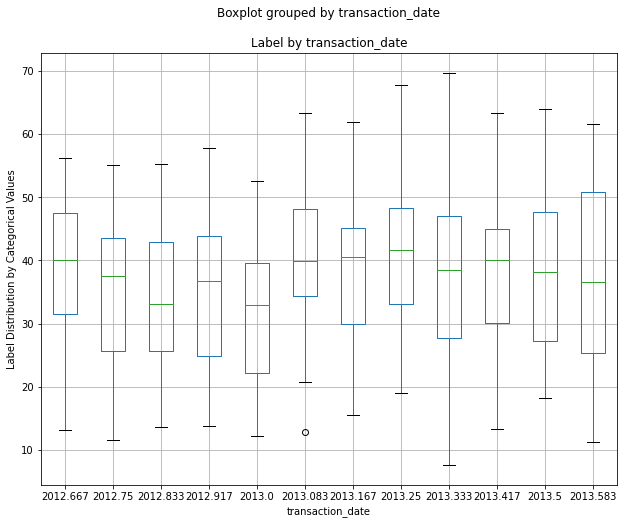

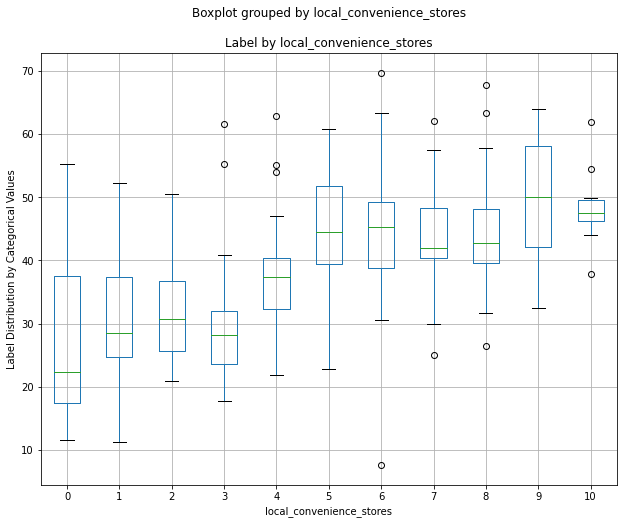

In [5]:
# Plotting Label vs each categorical feature
for col in data[['transaction_date','local_convenience_stores']]:
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    data.boxplot(column = 'price_per_unit', by = col, ax=ax)
    ax.set_title('Label by '+col)
    ax.set_ylabel("Label Distribution by Categorical Values")
plt.show() 

We don't see any predictive behaviour from **transaction_date** so we will omit it.


## SEPARATING FEATURES & LABEL and SPLITTING DATA FOR TRAINING AND VALIDATION
Using sk.learn.model_selection

In [6]:
from sklearn.model_selection import train_test_split

# Separating features as x (from house-age to longitude) and label as y (price_per_unit)
X, y = data[data.columns[1:6]].values, data[data.columns[6]].values

#Splitting data 70%-30% into training set and test set respectively
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

print('Training Set: %d rows \nTest Set: %d rows'% (X_train.shape[0],X_test.shape[0]))

Training Set: 285 rows 
Test Set: 123 rows


## PREPROCESSING DATA AND TRAINING A MODEL IN PIPELINE
We will first normalize the features and then will use "**RandomForestRegressor**" (supervied learning algorithm) to train the model.

In [7]:
# Training the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Defining preprocessing for numeric columns (will sclae them)
numeric_features = [0,1,3,4]   # index postions of numeric columns after omitting transaction_date
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combinig preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ])

# Creating preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor())])

# Fitting the pipeline to tarin a Linear Regression Model on training set
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


## EVALUATING THE MODEL

MSE: 36.112429189186805
RMSE: 6.0093617954976555
R2: 0.6918510105591331


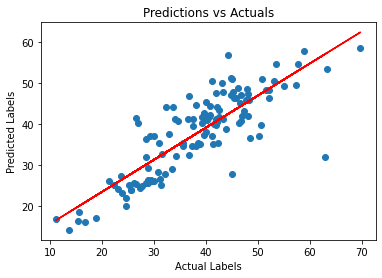

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Getting predictions
prediction = model.predict(X_test)

# Metrics displayed
mse = mean_squared_error(y_test, prediction) # MEan squarred error
print("MSE:", mse)
rmse = np.sqrt(mse) # Root mean squared error (Absolute measure of fit, lower the value, better the fit)
print("RMSE:", rmse)
r2 = r2_score(y_test, prediction)
print("R2:", r2) # R squared (relative measure of fit)

# Plotting of predictions vs actual
plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

## Using the Trained Model

Saved the trained model, and then used it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [9]:
import joblib

# Saving model as a pickel file
file_name = './real_estate_prediction_model.pkl'
joblib.dump(model, file_name)

# Loading model from the file
loaded_model = joblib.load(file_name)

# Using the array of features given above (excluding transaction_date)
X_NewFeatures = np.array([[16.2,289.3248,5,24.98203,121.54348],
                          [13.6,4082.015,0,24.94155,121.50381]])

# Using our model to predict price_per_unit
output = loaded_model.predict(X_NewFeatures)
print('Prediction(s): ')
i = 0 
for predictions in output:
    print('Price_per_unit for real estate at latitude : "'+ str(X_NewFeatures[i,3])+ '" & longitude: "'+ str(X_NewFeatures[i,4])+'" is = ', predictions)
    i = 1

Prediction(s): 
Price_per_unit for real estate at latitude : "24.98203" & longitude: "121.54348" is =  49.35749999999997
Price_per_unit for real estate at latitude : "24.94155" & longitude: "121.50381" is =  16.399800000000017


### Compleetd by Aman Poddar